In [9]:
install.packages('tidyverse' ,lib='/home/y21-thaned-tha/R/lib')

In [347]:
library(tidyverse,lib='/home/y21-thaned-tha/R/lib')
df <- read.csv('turnover.csv')
glimpse(df)

Rows: 1,129
Columns: 16
$ stag         <dbl> 7.030801, 22.965092, 15.934292, 15.934292, 8.410678, 8.96…
$ event        <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ gender       <chr> "m", "m", "f", "f", "m", "f", "f", "f", "f", "f", "f", "m…
$ age          <dbl> 35, 33, 35, 35, 32, 42, 42, 28, 29, 30, 40, 23, 22, 24, 2…
$ industry     <chr> "Banks", "Banks", "PowerGeneration", "PowerGeneration", "…
$ profession   <chr> "HR", "HR", "HR", "HR", "Commercial", "HR", "HR", "HR", "…
$ traffic      <chr> "rabrecNErab", "empjs", "rabrecNErab", "rabrecNErab", "yo…
$ coach        <chr> "no", "no", "no", "no", "yes", "yes", "yes", "no", "no", …
$ head_gender  <chr> "f", "m", "m", "m", "f", "m", "m", "m", "f", "m", "m", "m…
$ greywage     <chr> "white", "white", "white", "white", "white", "white", "wh…
$ way          <chr> "bus", "bus", "bus", "bus", "bus", "bus", "bus", "bus", "…
$ extraversion <dbl> 6.2, 6.2, 6.2, 5.4, 3.0, 6.2, 6.2, 3.8, 8.6, 5.4, 8.6, 3.…
$ independ     <

In [348]:
# Check duplicate row
print(paste('Duplicate row:' ,sum(duplicated(df))))

# Delete duplicate roe
df <- df[!duplicated(df), ]
row.names(df) <- NULL
nrow(df)

[1] "Duplicate row: 13"


[1] 1116

# Explore data
#### 40% of female who has female boss is likely to resign from the company

In [280]:

fil_df <- df %>%
  filter(event == 1)
  
gender_header_gender <- prop.table(xtabs(fil_df$event ~ fil_df$gender + fil_df$head_gender)) %>%
  as.data.frame() %>%
  dplyr::select(gender = fil_df.gender, header_gender = fil_df.head_gender, total = Freq) %>%
  arrange(desc(total))

gender_header_gender[,3]  = round(gender_header_gender[,3], 2)

gender_header_gender


gender,header_gender,total
<fct>,<fct>,<dbl>
f,f,0.40
f,m,0.36
m,m,0.17
m,f,0.06


#### gender vs coach

In [231]:

gender_coach <- prop.table(xtabs(fil_df$event ~ fil_df$gender + fil_df$coach)) %>%
  as.data.frame() %>%
  dplyr::select(gender = fil_df.gender, coach = fil_df.coach, total = Freq) %>% 
  arrange(desc(total))
  

gender_coach[,3]  = round(gender_coach[,3], 2)

gender_coach 

# as you can see that f and coach_no has the most turnover rate. so we try to input gender:coach in our model.
# Comparing to total resignation

gender,coach,total
<fct>,<fct>,<dbl>
f,no,0.45
f,my head,0.21
m,no,0.16
f,yes,0.11
m,my head,0.05
m,yes,0.03


#### Building industry has the most turnover rate at 76% comparing to its own industry.


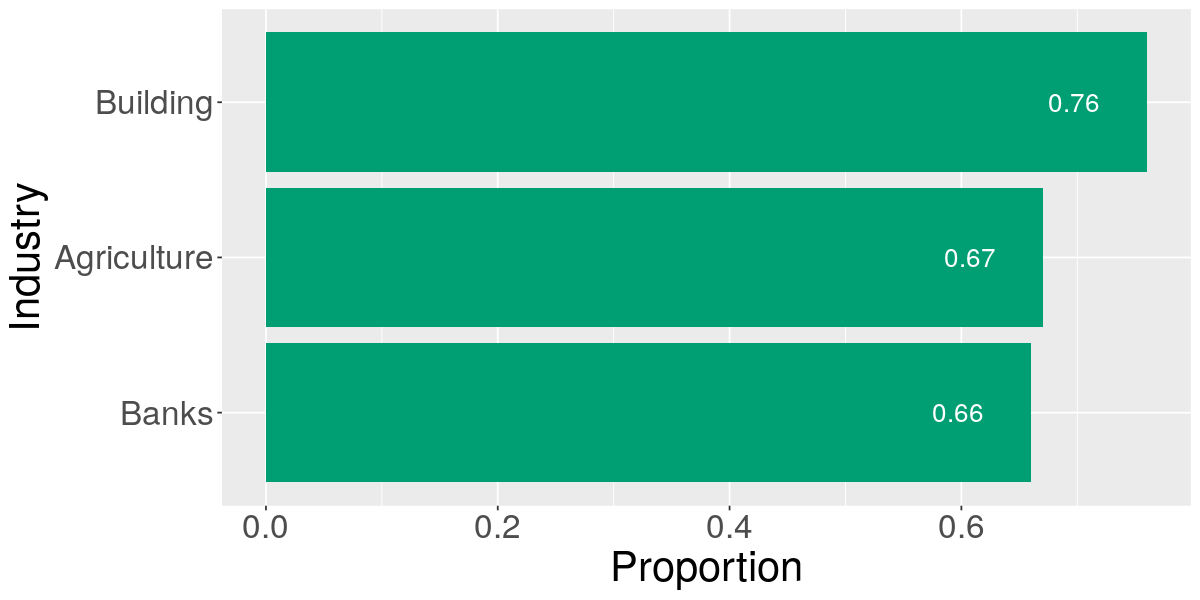

In [411]:
ind_leave <- fil_df %>%
 count(industry) %>%
 dplyr::select(industry, leave = n)

ind_total <- df %>%
 count(industry) %>%
 dplyr::select(total = n)

options(repr.plot.width=10, repr.plot.height=5)
cbind(ind_leave, ind_total) %>%
 mutate(proportion = round(leave/total, 2)) %>%
 dplyr::select(industry, proportion) %>%
 arrange(desc(proportion)) %>%
 head(3) %>%
 ggplot(aes(x= reorder(industry, proportion) , y=proportion)) +
 geom_bar(stat="identity", fill='#009E73') + 
 geom_text(aes(label=proportion ), hjust=1.9, color="white", size=5.5) + 
 theme( text = element_text(size = 25)) + 
 labs(x = 'Industry', y = 'Proportion') +
 coord_flip()
 

#### Employees who transports by car and bus resign from company at 52% comparing to its own transportation type.

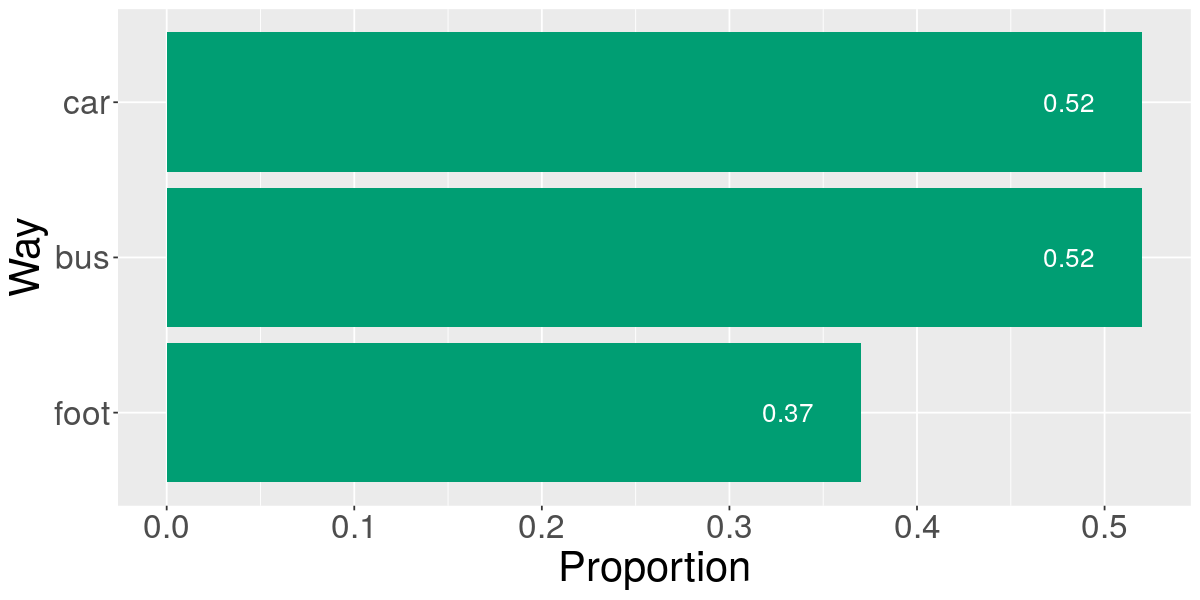

In [412]:
way_leave <- fil_df %>%
 count(way) %>%
 dplyr::select(way, leave = n)

way_total <- df %>%
 count(way) %>%
 dplyr::select(total = n)

options(repr.plot.width=10, repr.plot.height=5)
cbind(way_leave, way_total) %>%
 mutate(proportion = round(leave/total, 2)) %>%
 dplyr::select(way, proportion) %>%
 arrange(desc(proportion)) %>%
 head(3) %>%
 ggplot(aes(x=reorder(way, proportion), y=proportion)) +
 geom_bar(stat="identity", fill='#009E73') + 
 geom_text(aes(label=proportion), hjust=1.9, color="white", size=5.5) + 
 theme( text = element_text(size = 25)) + 
 labs(x = 'Way', y = 'Proportion') +
 coord_flip()

#### 66% of employees who get the position by referal method leave the company.

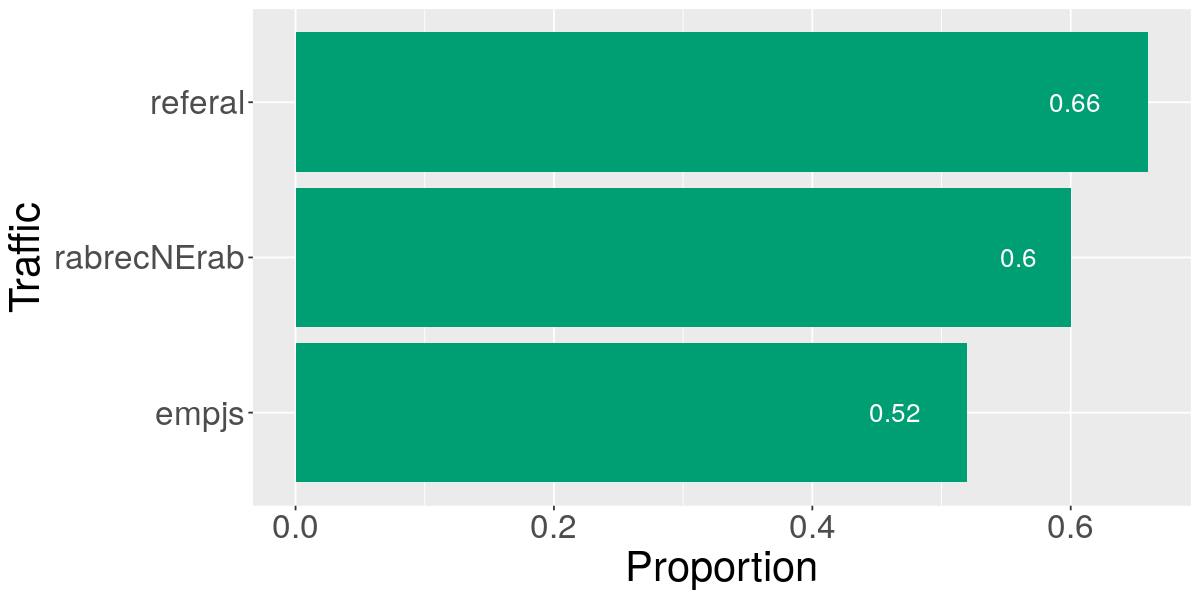

In [413]:
traffic_leave <- fil_df %>%
 count(traffic) %>%
 dplyr::select(traffic, leave = n)

traffic_total <- df %>%
 count(traffic) %>%
 dplyr::select(total = n)

options(repr.plot.width=10, repr.plot.height=5)
cbind(traffic_leave, traffic_total) %>%
 mutate(proportion = round(leave/total, 2)) %>%
 dplyr::select(traffic, proportion) %>%
 arrange(desc(proportion)) %>%
 head(3) %>%
 ggplot(aes(x=reorder(traffic, proportion), y=proportion)) +
 geom_bar(stat="identity", fill='#009E73') + 
 geom_text(aes(label=proportion), hjust=1.9, color="white", size=5.5) + 
 theme( text = element_text(size = 25)) + 
 labs(x = 'Traffic', y = 'Proportion') +
 coord_flip()

#### 100% employees who is specialized in teaching from the data set leave the company.

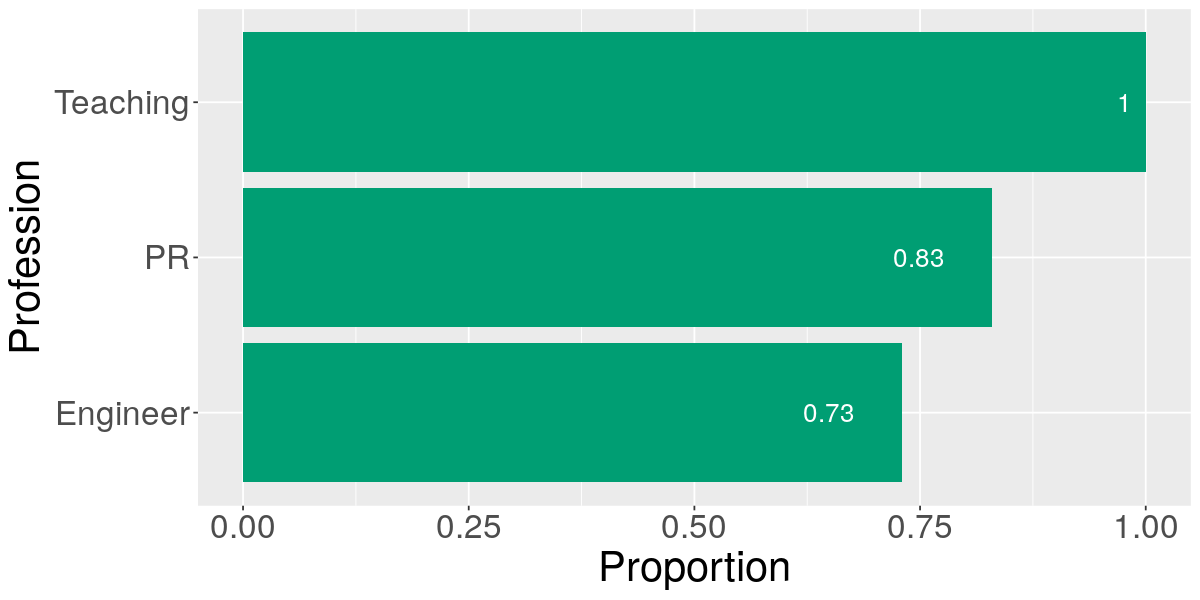

In [414]:
profession_leave <- fil_df %>%
 count(profession) %>%
 dplyr::select(profession, leave = n)

profession_total <- df %>%
 count(profession) %>%
 dplyr::select(total = n)

options(repr.plot.width=10, repr.plot.height=5)
cbind(profession_leave, profession_total) %>%
 mutate(proportion = round(leave/total, 2)) %>%
 dplyr::select(profession, proportion) %>%
 arrange(desc(proportion)) %>%
 head(3) %>%
 ggplot(aes(x=reorder(profession, proportion), y=proportion), fig(5,49)) +
 geom_bar(stat="identity", fill='#009E73') + 
 geom_text(aes(label=proportion), hjust=1.9, color="white", size=5.5) + 
 theme( text = element_text(size = 25)) + 
 labs(x = 'Profession', y = 'Proportion') +
 coord_flip()

#### Male supervisor has a little effect from female supervisor to resignation.

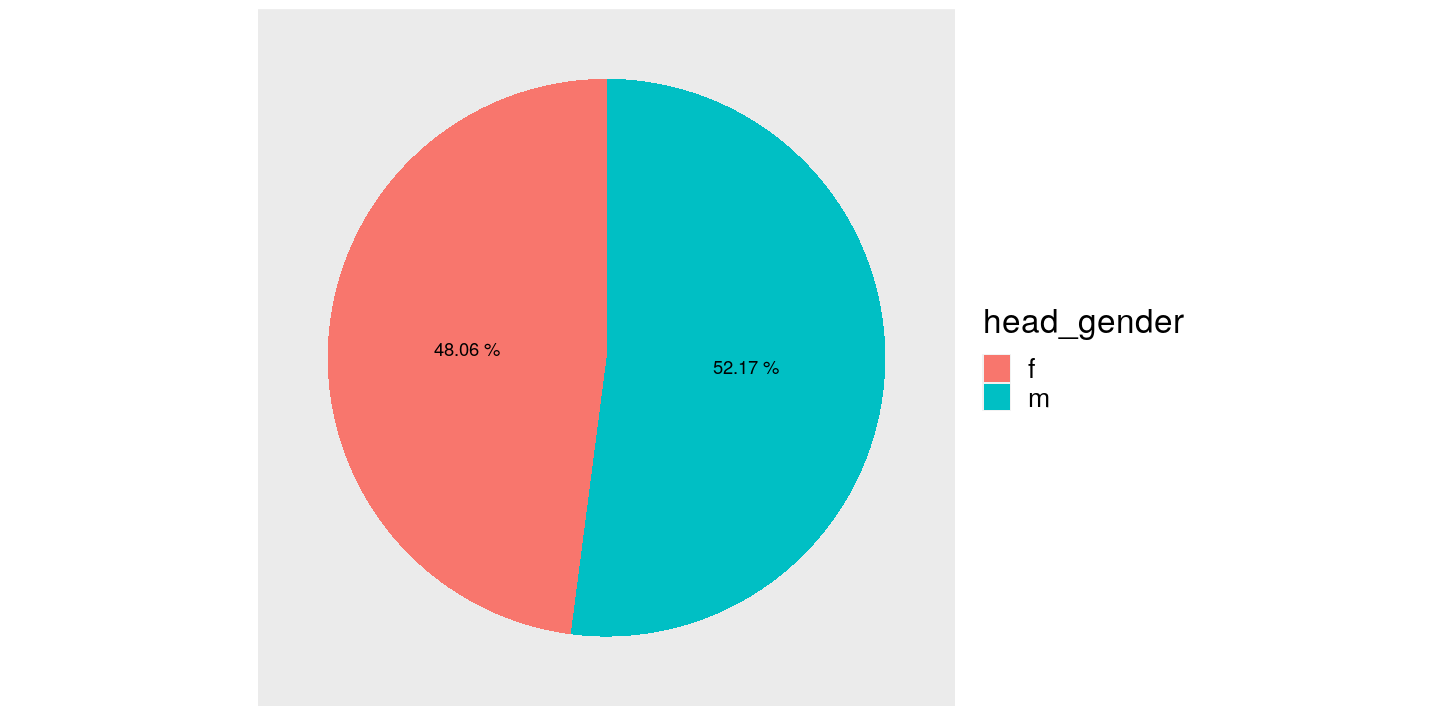

In [409]:
head_gender_leave <- fil_df %>%
 count(head_gender) %>%
 dplyr::select(head_gender, leave = n)

head_gender_total <- df %>%
 count(head_gender) %>%
 dplyr::select(total = n)

options(repr.plot.width=12, repr.plot.height=6)
cbind(head_gender_leave, head_gender_total) %>%
 mutate(proportion = round(leave/total*100, 2)) %>%
 dplyr::select(head_gender, proportion) %>%
 arrange(desc(proportion)) %>%
 head(3) %>%
  ggplot(aes(x = '', y= proportion, fill= head_gender)) +
  geom_col() +
  geom_text(aes(label = paste(proportion, '%')), 
            position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") + 
  theme( text = element_text(size = 20),
         axis.text = element_blank(),
         axis.ticks = element_blank(),
         panel.grid  = element_blank(),
         axis.title.x = element_blank(),
         axis.title.y = element_blank())

#### Proportion of greywage of resignation

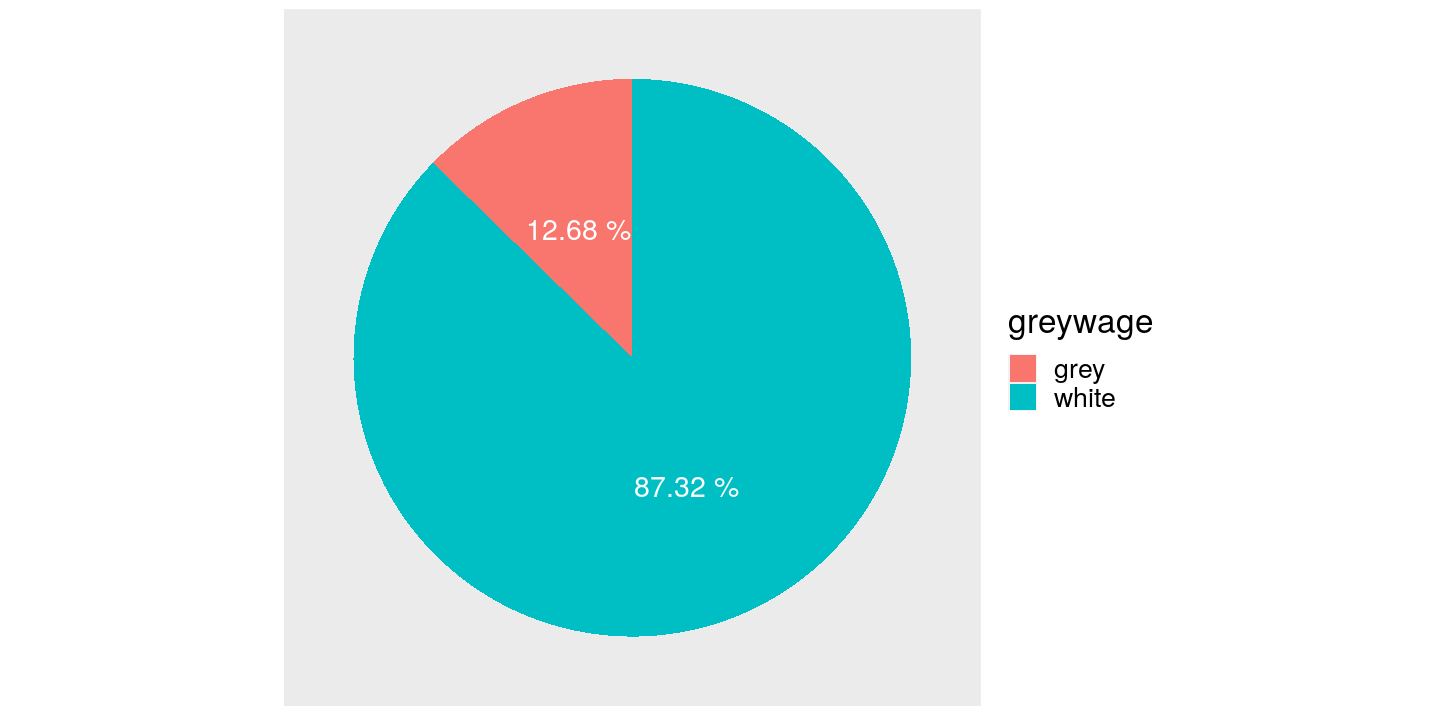

In [430]:

library(ggplot2)

pie_chart <- df %>% 
  dplyr::select(event, greywage) %>%
  filter(event == 1) %>%
  count(greywage) %>%
  dplyr::select (greywage, total = n) %>%
  mutate(percent = round(total/sum(total) * 100, 2))
  
options(repr.plot.width=12, repr.plot.height=6)
ggplot(pie_chart, aes(x = '', y= percent, fill= greywage)) +
  geom_col() +
  geom_text(aes(label = paste(percent, '%')), 
            position = position_stack(vjust = 0.5),
            size=6,
            color = 'white') +
  coord_polar(theta = "y") +
  theme( text = element_text(size = 20),
         axis.text = element_blank(),
         axis.ticks = element_blank(),
         panel.grid  = element_blank(),
         axis.title.x = element_blank(),
         axis.title.y = element_blank())


#### White wage in Retail industry has the most turnover rate about 20%

In [233]:
wage_df <- df %>%
            filter(event == 1)

prop.table (xtabs(wage_df$event ~ wage_df$greywage + wage_df$industry)) %>%
  as.data.frame() %>%
  arrange(desc(Freq)) %>%
  head(5)


 



,wage_df.greywage,wage_df.industry,Freq
,<fct>,<fct>,<dbl>
1,white,Retail,0.20178571
2,white,Banks,0.11964286
3,white,manufacture,0.09285714
4,white,etc,0.08928571
5,white,Consult,0.07142857


# Age and Work Experience distribution

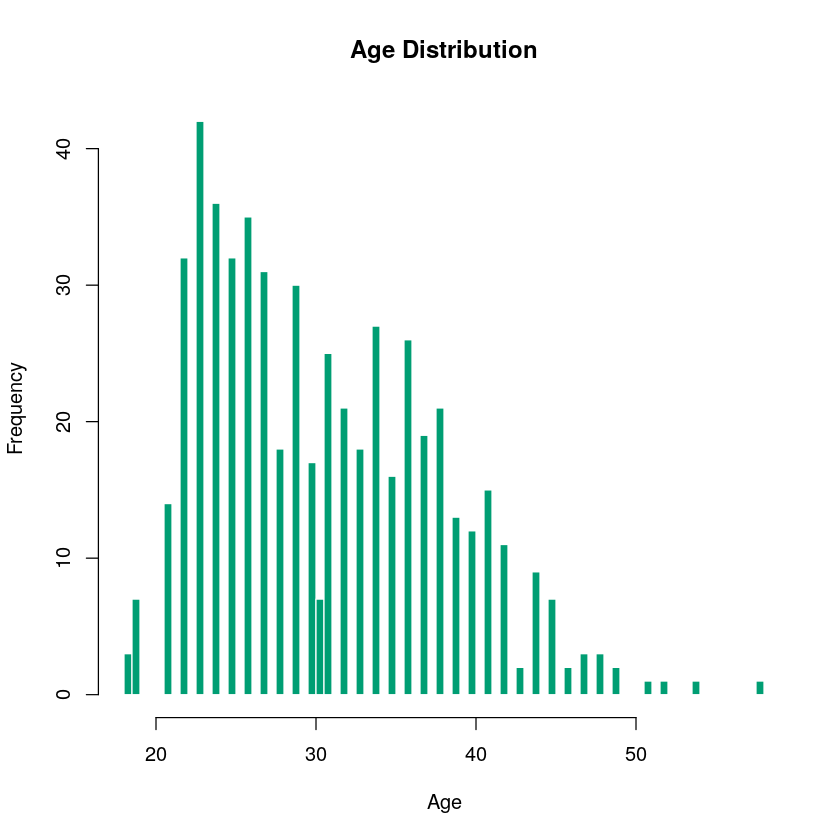

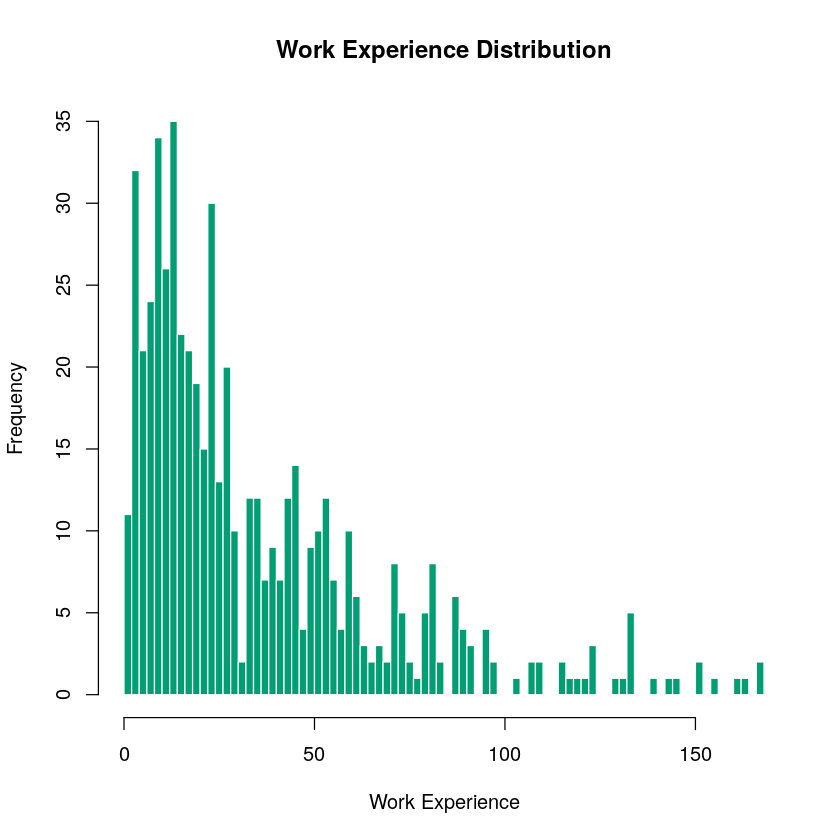

In [234]:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

filter_df <- df %>%
    filter(event == 1)

hist(filter_df$age, breaks = 100, col = cbPalette[4], main = "Age Distribution", border = F, xlab = "Age")

hist(filter_df$stag, breaks = 100, col = cbPalette[4], main = "Work Experience Distribution", border = F, xlab = "Work Experience")





# Goal1: Indicate factor that is associated with event

# Plot Sample logit vs features

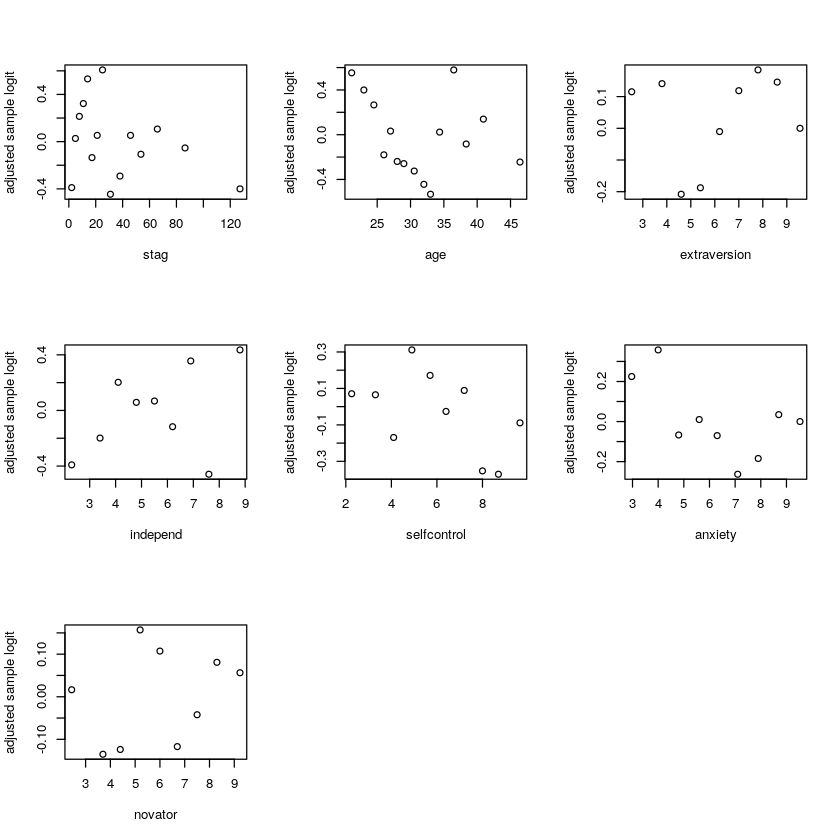

In [237]:

logitplot<-function(y, x,ncat=15,...)
{
  brksx<-unique(quantile(x,probs=(0:ncat)/ncat))
  nbrksx<-length(brksx)
  cutx<-cut(x,breaks=brksx,include.lowest=TRUE)
  yt<-table(data.frame(y,cutx))
  mx<-tapply(x,cutx,FUN=mean)
  logity<-log((yt[2,]+0.5)/(yt[1,]+0.5))
  plot(mx,logity,...)
}

#reduced_model <-  step(glm(event ~ stag + I(stag^2) + gender + age + I(age^2) + I(age^3) + industry + profession + traffic + coach + head_gender + greywage + way + extraversion + I(extraversion^2) + I(extraversion^3) + independ + selfcontrol + I(selfcontrol^2)+ anxiety + I(anxiety^2) + novator + gender:head_gender, family = binomial(link = 'logit'), data = df) ,direction= "backward")


par(mfrow=c(3,3))
logitplot(df$event,df$stag,xlab="stag",ylab="adjusted sample logit") # second order
logitplot(df$event,df$age,xlab="age",ylab="adjusted sample logit") # Third order
logitplot(df$event,df$extraversion,xlab="extraversion",ylab="adjusted sample logit") # Third order
logitplot(df$event,df$independ,xlab="independ",ylab="adjusted sample logit")
logitplot(df$event,df$selfcontrol,xlab="selfcontrol",ylab="adjusted sample logit") # second order
logitplot(df$event,df$anxiety,xlab="anxiety",ylab="adjusted sample logit") # second order
logitplot(df$event,df$novator,xlab="novator",ylab="adjusted sample logit")

# Create Reduced model from data set by using step (AIC)

In [238]:
reduced_assoc_model <-  step(glm(event ~ stag + I(stag^2) + gender + age + I(age^2) + I(age^3) + industry + profession + traffic + coach + head_gender + greywage + way + extraversion + I(extraversion^2) + I(extraversion^3) + independ + selfcontrol + I(selfcontrol^2)+ anxiety + I(anxiety^2) + novator + gender:coach , family = binomial(link = 'logit'), data = df) ,direction= "backward")




Start:  AIC=1471.76
event ~ stag + I(stag^2) + gender + age + I(age^2) + I(age^3) + 
    industry + profession + traffic + coach + head_gender + greywage + 
    way + extraversion + I(extraversion^2) + I(extraversion^3) + 
    independ + selfcontrol + I(selfcontrol^2) + anxiety + I(anxiety^2) + 
    novator + gender:coach

                    Df Deviance    AIC
- gender:coach       2   1353.5 1469.5
- extraversion       1   1351.8 1469.8
- independ           1   1351.8 1469.8
- I(extraversion^2)  1   1351.8 1469.8
- greywage           1   1351.8 1469.8
- I(extraversion^3)  1   1351.8 1469.8
- selfcontrol        1   1352.0 1470.0
- stag               1   1352.0 1470.0
- I(stag^2)          1   1352.0 1470.0
- I(anxiety^2)       1   1352.1 1470.1
- novator            1   1352.2 1470.2
- I(selfcontrol^2)   1   1352.2 1470.2
- anxiety            1   1352.5 1470.5
<none>                   1351.8 1471.8
- head_gender        1   1355.5 1473.5
- way                2   1362.5 1478.5
- I(age^3)  

# Add  missing main effect after using step

In [239]:
reduced_assoc_model <- glm(event ~ stag + gender + age + I(age^2) + I(age^3) + industry + profession + traffic + head_gender + way, family = binomial(link = 'logit'), data = df)
summary(reduced_assoc_model)



Call:
glm(formula = event ~ stag + gender + age + I(age^2) + I(age^3) + 
    industry + profession + traffic + head_gender + way, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.20898  -1.02720   0.00034   1.05019   2.09399  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    1.724e+01  4.556e+00   3.783 0.000155 ***
stag                          -5.870e-03  2.120e-03  -2.768 0.005635 ** 
genderm                       -2.889e-01  1.814e-01  -1.593 0.111263    
age                           -1.446e+00  4.031e-01  -3.586 0.000336 ***
I(age^2)                       4.018e-02  1.178e-02   3.410 0.000650 ***
I(age^3)                      -3.623e-04  1.116e-04  -3.245 0.001174 ** 
industryAgriculture           -3.723e-01  8.859e-01  -0.420 0.674291    
industryBanks                  3.154e-01  6.553e-01   0.481 0.630331    
industryBuilding      

# Create Full model from data set

In [240]:
full_assoc_model = glm(event ~ stag + I(stag^2) + gender + age + I(age^2) + I(age^3) + industry + profession + traffic + coach + head_gender + greywage + way + extraversion + I(extraversion^2) + I(extraversion^3) + independ + selfcontrol + I(selfcontrol^2)+ anxiety + I(anxiety^2) + novator + gender:coach , family = binomial(link = 'logit'), data = df)

summary(full_assoc_model)




Call:
glm(formula = event ~ stag + I(stag^2) + gender + age + I(age^2) + 
    I(age^3) + industry + profession + traffic + coach + head_gender + 
    greywage + way + extraversion + I(extraversion^2) + I(extraversion^3) + 
    independ + selfcontrol + I(selfcontrol^2) + anxiety + I(anxiety^2) + 
    novator + gender:coach, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.13218  -1.01613   0.00034   1.03173   2.05287  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    1.743e+01  4.863e+00   3.585 0.000338 ***
stag                          -3.059e-03  5.830e-03  -0.525 0.599770    
I(stag^2)                     -2.394e-05  4.439e-05  -0.539 0.589650    
genderm                       -5.943e-01  3.311e-01  -1.795 0.072669 .  
age                           -1.405e+00  4.086e-01  -3.440 0.000582 ***
I(age^2)                       3.904e-02  1.19

# Compare nested model

In [241]:
LRT <- deviance(reduced_assoc_model) - deviance(full_assoc_model)
pchisq(LRT, df.residual(reduced_assoc_model) - df.residual(full_assoc_model), lower.tail = F)

[1] 0.9429618

#### H0: Reduced model
#### H1: Full model
#### P-Value: 0.942961760169536 > 0.05 (Not Significant)
#### Conclusion: We fail to reject H0. We choose reduced model.

# Test goodness of fit test by HL Test

In [243]:
hosmerlem <-function (y, yhat, g = 10)
{
cutyhat <- cut(yhat, breaks = quantile(yhat, probs = seq(0,1, 1/g)), include.lowest = T)
obs <- xtabs(cbind(1 - y, y) ~ cutyhat)
expect <- xtabs(cbind(1 - yhat, yhat) ~ cutyhat)
chisq <- sum((obs - expect)^2/expect)
P <- 1 - pchisq(chisq, g - 2)
c("X^2" = chisq, Df = g - 2, "P(>Chi)" = P)
}

hosmerlem(df$event, reduced_assoc_model$fitted.values)

X^2        Df   P(>Chi) 
5.1665842 8.0000000 0.7396321

#### H0: Model fits data
#### H1: Model does not fit data
#### P-Value: 0.739632078353907 > 0.05 (Not Significant)
#### Conclusion: We fail to reject H0. The Model fits data.

# Check influential point

[1] "Rule1 F(0.5, p+1, n-p-1): 0.985839183544604"
[1] "Rule2 4/n: 0.003584229390681"


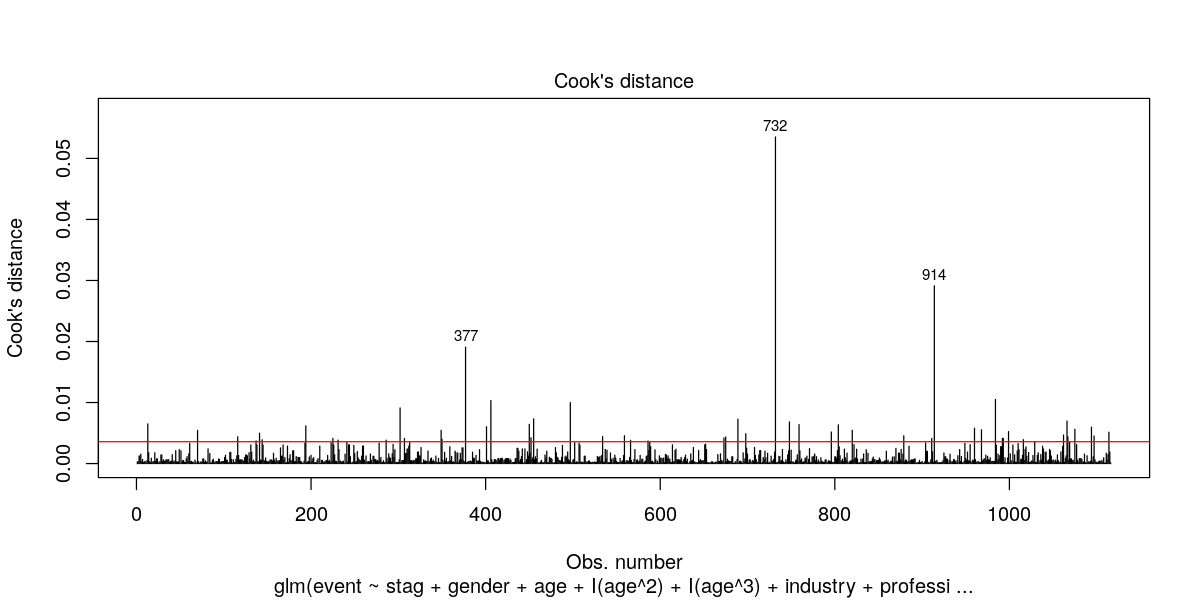

In [417]:

plot(reduced_assoc_model, 4)
abline(h = qf(0.5, reduced_assoc_model$rank, nrow(df)-reduced_assoc_model$rank), col='blue') # Rule1
abline(h = 4/nrow(df), col='red') # Rule2

print(paste('Rule1 F(0.5, p+1, n-p-1):',qf(0.5, reduced_assoc_model$rank, nrow(df)-reduced_assoc_model$rank)))
print(paste('Rule2 4/n:',4/nrow(df)))




#### From Cook's distance, We use 50th percentile of F(46-1,1116-46+1 ) = 0.98. Thus, there is no an influential point in our data.

# Check multicolinearity with VIF

In [245]:
str(df)

'data.frame':	1116 obs. of  16 variables:
 $ stag        : num  7.03 22.97 15.93 15.93 8.41 ...
 $ event       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ gender      : chr  "m" "m" "f" "f" ...
 $ age         : num  35 33 35 35 32 42 28 29 30 40 ...
 $ industry    : chr  "Banks" "Banks" "PowerGeneration" "PowerGeneration" ...
 $ profession  : chr  "HR" "HR" "HR" "HR" ...
 $ traffic     : chr  "rabrecNErab" "empjs" "rabrecNErab" "rabrecNErab" ...
 $ coach       : chr  "no" "no" "no" "no" ...
 $ head_gender : chr  "f" "m" "m" "m" ...
 $ greywage    : chr  "white" "white" "white" "white" ...
 $ way         : chr  "bus" "bus" "bus" "bus" ...
 $ extraversion: num  6.2 6.2 6.2 5.4 3 6.2 3.8 8.6 5.4 8.6 ...
 $ independ    : num  4.1 4.1 6.2 7.6 4.1 6.2 5.5 6.9 5.5 4.1 ...
 $ selfcontrol : num  5.7 5.7 2.6 4.9 8 4.1 8 2.6 3.3 1.8 ...
 $ anxiety     : num  7.1 7.1 4.8 2.5 7.1 5.6 4 4 7.9 7.1 ...
 $ novator     : num  8.3 8.3 8.3 6.7 3.7 6.7 4.4 7.5 8.3 6.7 ...


In [246]:
library(usdm)
vif(df[,c(-2,-3,-5,-6,-7,-8,-9,-10, -11)])



Variables,VIF
<chr>,<dbl>
stag,1.055084
age,1.080200
extraversion,2.079629
independ,1.782126
selfcontrol,2.355681
anxiety,1.706672
novator,1.565977


#### For numerical variables, there are no multicolinearity because their VIF value are nearly 1. 

In [247]:
summary(reduced_assoc_model)


Call:
glm(formula = event ~ stag + gender + age + I(age^2) + I(age^3) + 
    industry + profession + traffic + head_gender + way, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.20898  -1.02720   0.00034   1.05019   2.09399  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    1.724e+01  4.556e+00   3.783 0.000155 ***
stag                          -5.870e-03  2.120e-03  -2.768 0.005635 ** 
genderm                       -2.889e-01  1.814e-01  -1.593 0.111263    
age                           -1.446e+00  4.031e-01  -3.586 0.000336 ***
I(age^2)                       4.018e-02  1.178e-02   3.410 0.000650 ***
I(age^3)                      -3.623e-04  1.116e-04  -3.245 0.001174 ** 
industryAgriculture           -3.723e-01  8.859e-01  -0.420 0.674291    
industryBanks                  3.154e-01  6.553e-01   0.481 0.630331    
industryBuilding      

# Interpret coefficient of logistic regression
#### exp{-2.889e-01(0-1)} = 1.334958226
#### Comparing a woman with a man of the same age, the estimated odds ratio is exp{-2.889e-01(0-1)} = 1.334958226. Thus, a woman’s odds were about 1.33 times the odds of turnover of a man of the same age.



# Predictive Performance

# Check AUC of ROC

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = truth_reduce, predictor = y_pred_reduce,     percent = TRUE, plot = TRUE, print.auc = TRUE, auc.polygon = TRUE,     xlim = c(100, 0))

Data: y_pred_reduce in 556 controls (truth_reduce 0) < 560 cases (truth_reduce 1).
Area under the curve: 72.35%

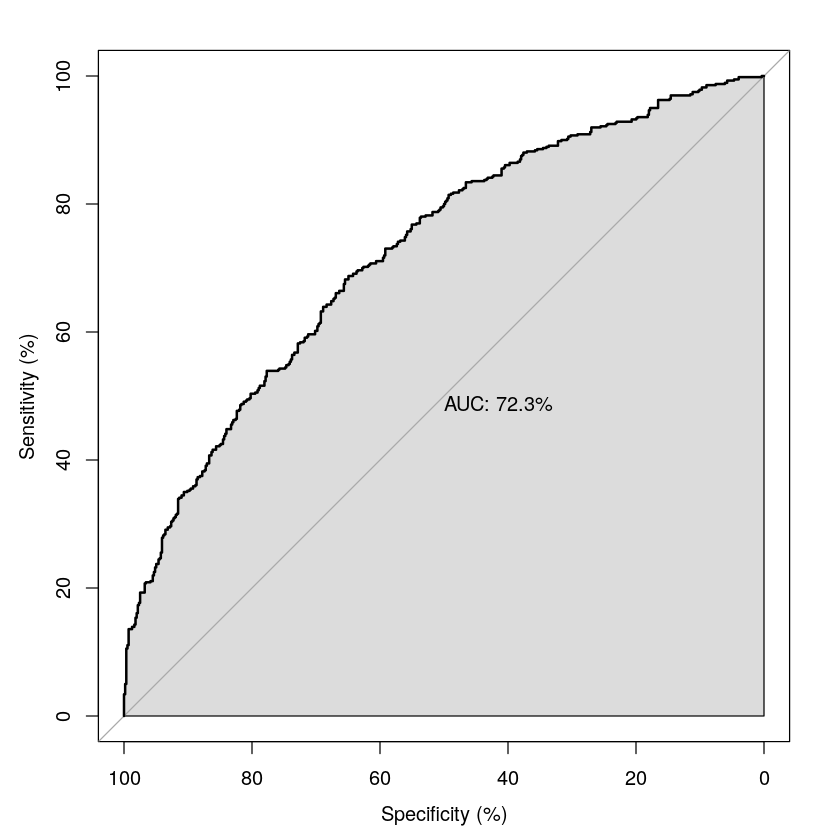

In [250]:
library(pROC);

y_pred_reduce <-predict(reduced_assoc_model , newdata=df, type="response")
predclass_reduce<-rep(0, nrow(df))
truth_reduce<-df$event

roc(truth_reduce, y_pred_reduce, percent=TRUE, plot=TRUE,print.auc=TRUE, auc.polygon=TRUE, xlim=c(100,0))

# Check ROC curve to get youden index

In [426]:
# Use 0.5 as cutoff point

predclass_reduce<-rep(0, nrow(df))

# Use youden index as cutoff point
youden_index <- 0.68 + 0.79 - 1 #youden_index <- 0.47

#youden_index <- 0.68 + 0.65 - 1

predclass_reduce[y_pred_reduce>=youden_index]<-1
truth_reduce<-df$event
xtab_reduce <-table(truth_reduce, predclass_reduce)
xtab_reduce

            predclass_reduce
truth_reduce   0   1
           0 344 212
           1 167 393

# Calculate Accuracy, Sensitivity, Specificity

In [425]:
accuracy <- (xtab_reduce[1,1] + xtab_reduce[2,2]) / sum(xtab_reduce)
sensitivity <- xtab_reduce[2,2]/ (xtab_reduce[2,2] + xtab_reduce[2,1])
specification <- xtab_reduce[1,1] / (xtab_reduce[1,1] + xtab_reduce[1,2])
false_positive_rate <- 1-specification
print(paste('Accuracy:', round(accuracy, 2))) 
print(paste('Sensitivity:', round(sensitivity, 2))) # ความแม่นของการตรวจว่า ลาออก
print(paste('Specification:', round(specification, 2))) # ความแม่นของการตรวจว่า ไม่ลาออก
print(paste('False positive rate:', round(false_positive_rate, 2))) # โอกาสผิดของการตรวจว่า ลาออก

[1] "Accuracy: 0.61"
[1] "Sensitivity: 0.9"
[1] "Specification: 0.32"
[1] "False positive rate: 0.68"
